# Data generation for polyglot data science example

In order to run the full [Polyglot Data Science with IPython notebook](polyglot-ds.ipynb), you will need to install [Julia](https://julialang.org/downloads), and then the following (assuming a conda-based deployment that will automatically pull in R, otherwise you also need ot install R):

```
conda install jupyter cython pandas matplotlib seaborn
conda install rpy2
pip install julia fortran-magic 
```

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We generate synthetic data according to

$$
y(x) = a x + b x^2 + c \sin(x^2) + \cal{N}(0, \epsilon)
$$

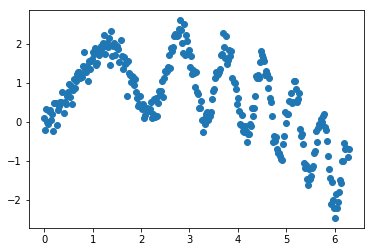

In [2]:
npts = 300
eps = 0.2  # noise
a, b, c  = 1, -0.2, 1 # model coefficients

np.random.seed(1234)
x = np.linspace(0, 2*np.pi, npts)
y = a*x + b*x**2 + c*np.sin(x**2) + np.random.normal(scale=eps, size=npts)
plt.plot(x, y, 'o');

Write it to a CSV file for convenient retrieval in a "typical" workflow, Pandas does the job nicely:

In [3]:
data = pd.DataFrame({'x':x, 'y':y})
data.head(3)

,x,y
0,0.000000,0.094287
1,0.021014,-0.216828
2,0.042028,0.329982


In [4]:
data.to_csv('data.csv', index=False)
!head -3 data.csv

x,y
0.0,0.09428703274649862
0.02101399768287487,-0.21682787079387694


Sanity check

In [5]:
data2 = pd.read_csv('data.csv')
data2.head(3)

,x,y
0,0.000000,0.094287
1,0.021014,-0.216828
2,0.042028,0.329982


In [6]:
(data2-data).abs().sum()

x    5.894937e-14
y    1.431537e-14
dtype: float64